# 1.Linear regression with one variable

In [560]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [561]:
df = pd.read_csv('ex1data1.txt',header=None)

In [562]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [563]:
df.columns = ['population','profit']

In [564]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 2.1 Plotting the data

Text(0, 0.5, 'Profit in $10,000s')

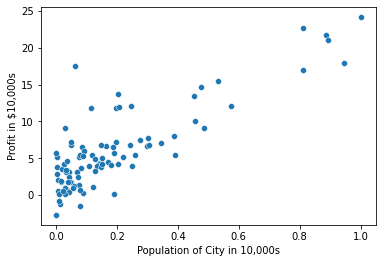

In [572]:

ax = sns.scatterplot(x=df["population"],y=df["profit"])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [575]:
scaler = MinMaxScaler()

df[['population']] = scaler.fit_transform(df[['population']])
df['ones'] = np.ones(df.shape[0])

In [577]:
X = np.transpose(df[['ones','population']].to_numpy())
y = np.transpose(df[['profit']].to_numpy("float"))

# 2.2 Gradient Descent

In [578]:
### User Defined Linear Regression
cost_hist = []
def estimate_coef_linear_regression(X_train, y_train):
    
    Theta = np.zeros(X_train.shape[0]).reshape(-1,1)

    a = 0.2
    m = X_train.shape[1]

    for i in range(100000):
        h = np.dot(Theta.T,X_train)
        J = np.sum((h-y_train)**2)/(2*m)
        cost_hist.append(J)
        tmp0 = Theta[0:1] - (a/m) * np.sum(h-y_train)
        tmp1 = Theta[1:] - (a/m) * np.dot((h-y_train),X_train.T[0:,1:])
        Theta[0:1] = tmp0
        Theta[1:] = tmp1
    
    return Theta

In [580]:
Theta = estimate_coef_linear_regression(X, y)

In [581]:
Theta

array([[ 2.10147995],
       [20.49166518]])

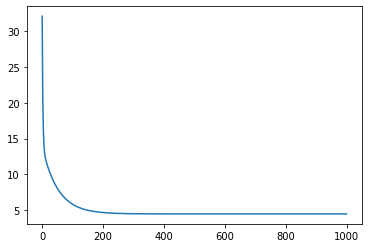

In [582]:
plt.plot(np.arange(0,1000),cost_hist[0:1000])

# 3. Linear regression with multiple variables

In [583]:
df = pd.read_csv('ex1data2.txt',header=None)

In [584]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [585]:
df.shape

(47, 3)

In [587]:
df.columns = ['size','bedrooms','price']

In [588]:
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Text(0, 0.5, 'Price')

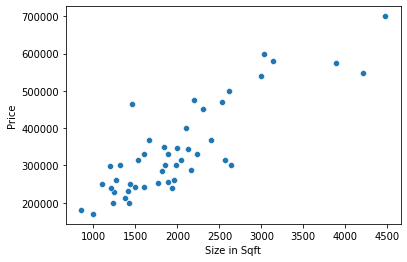

In [590]:
ax = sns.scatterplot(x=df['size'],y=df.price)
plt.xlabel("Size in Sqft")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

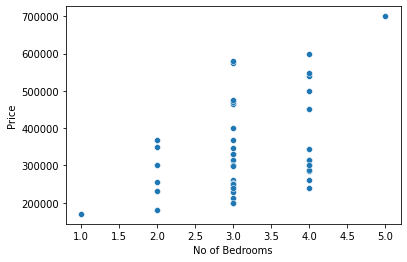

In [591]:
ax = sns.scatterplot(x=df['bedrooms'],y=df.price)
plt.xlabel("No of Bedrooms")
plt.ylabel("Price")

# 3.1 Feature Normalization

In [593]:
df[['size','bedrooms']] = scaler.fit_transform(df[['size','bedrooms']])
df['ones'] = np.ones(df.shape[0])

In [594]:
X = np.transpose(df[['ones','size','bedrooms']].to_numpy())
y = np.transpose(df[['price']].to_numpy("float"))

In [596]:
Theta = estimate_coef_linear_regression(X, y)

In [597]:
Theta

array([[199467.38469348],
       [504777.90398786],
       [-34952.07644926]])

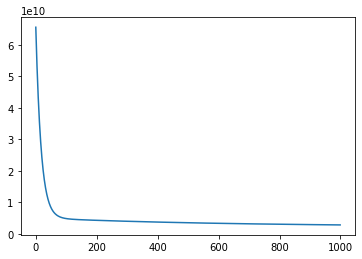

In [598]:
plt.plot(np.arange(0,1000),cost_hist[0:1000])

# 3.3 Normal Equations

In [601]:
theta = np.dot(np.linalg.inv(np.dot(X, X.T)), np.dot(X, y.T))

In [602]:
theta

array([[199467.38469349],
       [504777.90398791],
       [-34952.07644931]])

In [603]:
np.dot(theta.T,np.array([1,1650,3]))

array([8.32978153e+08])